In [1]:
import pandas as pd
df = pd.read_csv('c:/data/iris/iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
from sqlalchemy import create_engine
import cx_Oracle
# oracle server에 접속하기 위한 엔진 생성
# oracle+cx_oracle://아이디:비번@db
engine = create_engine('oracle+cx_oracle://python:1234@xe')
conn = engine.connect()
# 데이터 프레임의 내용을 테이블로 export
df.to_sql(name='iris', con=engine, if_exists='replace', index=False)

150

In [3]:
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")

cursor = conn.cursor()                      
cursor.execute('select * from ontime where rownum < 5')

rows = cursor.fetchall()         
for row in rows:
    print(row)
    
cursor.close()  
conn.close()

(2007, 1, 1, 1, '1232', 1225, '1341', 1340, 'WN', '2891', 'N351', '69', '75', '54', '1', '7', 'SMF', 'ONT', '389', '4', '11', '0', None, '0', '0', '0', '0', '0', '0')
(2007, 1, 1, 1, '1918', 1905, '2043', 2035, 'WN', '462', 'N370', '85', '90', '74', '8', '13', 'SMF', 'PDX', '479', '5', '6', '0', None, '0', '0', '0', '0', '0', '0')
(2007, 1, 1, 1, '2206', 2130, '2334', 2300, 'WN', '1229', 'N685', '88', '90', '73', '34', '36', 'SMF', 'PDX', '479', '6', '9', '0', None, '0', '3', '0', '0', '0', '31')
(2007, 1, 1, 1, '1230', 1200, '1356', 1330, 'WN', '1355', 'N364', '86', '90', '75', '26', '30', 'SMF', 'PDX', '479', '3', '8', '0', None, '0', '23', '0', '0', '0', '3')


In [4]:
# 항공사별 출발 지연 시간 평균(실행시간이 오래 걸림)
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")

cursor = conn.cursor()                      
cursor.execute('''
select uniquecarrier, round(avg(depdelay),1)
from ontime
group by uniquecarrier
''')    
rows = cursor.fetchall()         
for row in rows:
    print('{}\t{}'.format(row[0],row[1]))

cursor.close()
conn.close()

NW	8.8
XE	11.6
UA	13.6
F9	7.4
AA	14.3
FL	8.9
AQ	0.4
AS	10.6
OO	8.1
OH	12.1
CO	11.7
YV	11.9
HA	-0.9
WN	10.3
US	11.9
9E	8.8
MQ	12.6
EV	19.6
DL	7.7
B6	14.5


In [5]:
# 항공사별 도착 지연 시간 평균(실행시간이 오래 걸림)
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")

cursor = conn.cursor()                      
cursor.execute('''
select uniquecarrier, round(avg(arrdelay),1)
from ontime
group by uniquecarrier
''')    
rows = cursor.fetchall()         
for row in rows:
    print('{}\t{}'.format(row[0],row[1]))

cursor.close()
conn.close()

NW	12.3
XE	9.7
UA	12.4
F9	7.4
AA	14
FL	7.8
AQ	-1.4
AS	9.1
OO	8.6
OH	12.6
CO	10.1
YV	10.5
HA	-0.4
WN	5.4
US	11.3
9E	7.9
MQ	12.4
EV	16.6
DL	7.2
B6	13.1


In [8]:
# 2007년 도착지연횟수 월별 집계
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")

cursor = conn.cursor()                      
cursor.execute('''
select month, count(*) 
from ontime
where year=2007 and arrdelay > 0
group by month
order by month
''')    
rows = cursor.fetchall()         
for row in rows:
    print('{}\t{}'.format(row[0],row[1]))

cursor.close()
conn.close()

1	286334
2	284152
3	293360
4	273055
5	275332
6	326446
7	326559
8	317197
9	225751
10	270098
11	242722
12	332449


In [9]:
x=list(range(1,13))
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[286334, 284152, 293360, 273055, 275332, 326446, 326559, 317197, 225751, 270098, 242722, 332449]


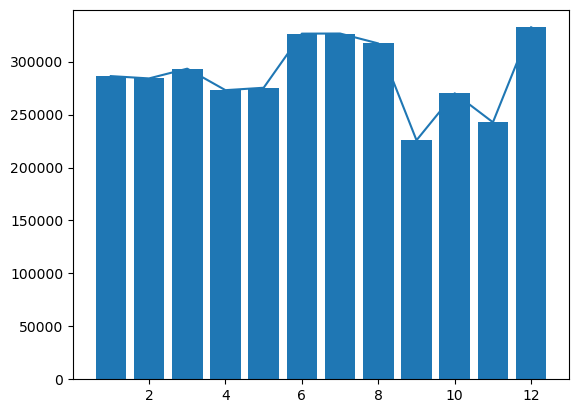

In [10]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.bar(x,y)
plt.show()

In [11]:
# 요일별 평균 지연 시간
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")

cursor = conn.cursor()                      
cursor.execute('''
select dayofweek, avg(arrdelay)
from ontime
group by dayofweek
''')    
rows = cursor.fetchall()         
for row in rows:
    print('{}\t{}'.format(row[0],row[1]))

cursor.close()
conn.close()

6	5.735648821755891
7	10.097206685656515
1	10.280262729735707
2	8.047561475371838
5	12.747663814379557
4	12.363173179756918
3	9.697532644293378


In [12]:
x=['월', '화', '수', '목', '금', '토', '일']
y=[]
for row in rows:
    y.append(row[1])
print(x)
print(y)

['월', '화', '수', '목', '금', '토', '일']
[5.735648821755891, 10.097206685656515, 10.280262729735707, 8.047561475371838, 12.747663814379557, 12.363173179756918, 9.697532644293378]


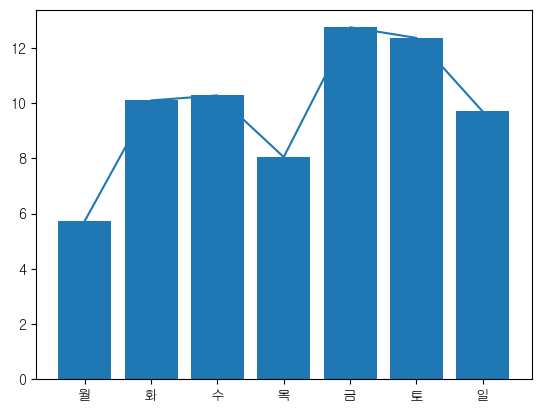

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc,font_manager
font_name=font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font',family=font_name)

plt.plot(x,y)
plt.bar(x,y)
plt.show()

In [14]:
# 시간대별(10월, 월요일에 출발할 때 가장 좋은 시간대는?)
import cx_Oracle
conn = cx_Oracle.connect("python/1234@localhost:1521/xe")

cursor = conn.cursor()
cursor.execute('''
select * 
from (
    select rownum as rn, A.*
    from (
        select CRSDepTime, avg(arrdelay) arrdelay
        from ontime
        where month=10 and dayofweek = 1
        group by CRSDepTime
        order by arrdelay
    ) A
) where rn between 1 and 5
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

cursor.close()
conn.close()

(1, 1924, -47)
(2, 2257, -32)
(3, 300, -29.4)
(4, 2244, -20)
(5, 1801, -18.6)
